<a href="https://colab.research.google.com/github/chema74/AI-Portfolio-2025/blob/main/04_Regresion_Lineal_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📉 Módulo 4: Regresión Lineal Simple

La Regresión Lineal Simple es un algoritmo de **Aprendizaje Supervisado** utilizado para predecir una **variable objetivo numérica** (dependiente, $Y$) basándose en una **única variable de entrada** (independiente, $X$).

## Conceptos Clave de la Regresión Lineal

### 1. El Objetivo
El objetivo es encontrar la **línea recta que mejor se ajuste** a los puntos de datos, minimizando la distancia vertical entre la línea y cada punto. Esta línea se conoce como la **Línea de Mínimos Cuadrados**.

### 2. La Ecuación Matemática
La relación se describe mediante una ecuación de la recta:

$$Y = \beta_0 + \beta_1 X + \epsilon$$

* **$Y$ (Variable Dependiente):** El valor que queremos **predecir** (nuestro objetivo).
* **$X$ (Variable Independiente):** La característica de entrada que usamos para la predicción.
* **$\beta_0$ (Intercepto):** El punto donde la línea cruza el eje Y (el valor de $Y$ cuando $X=0$).
* **$\beta_1$ (Coeficiente/Pendiente):** Determina la inclinación de la línea. Indica cuánto cambia $Y$ por cada cambio unitario en $X$.
* **$\epsilon$ (Error):** El término de error, la diferencia entre el valor predicho y el valor real.

### 3. Librerías Clave
* **scikit-learn (sklearn):** La librería estándar de Python para Machine Learning. Proporciona las herramientas para el modelado, entrenamiento, y evaluación de algoritmos.

Para este ejercicio, usaremos una variable simple (Precio_Unitario) para predecir otra (Cantidad), aunque en la vida real se usarían más variables.

✅ Librerías de modelado importadas.
----------------------------------------------------------------------
1. Variable X (Predictor) lista. Forma (muestras, características): (6, 1)
2. Variable Y (Objetivo) lista. Forma (muestras): (6,)
----------------------------------------------------------------------
3. Tamaño del conjunto de Entrenamiento (X_train): 4 muestras
4. Tamaño del conjunto de Prueba (X_test): 2 muestras
----------------------------------------------------------------------
5. Modelo de Regresión Lineal Simple entrenado.
   Intercepto (beta_0): 2.91
   Coeficiente (beta_1 para Dias_Envio): -0.11
----------------------------------------------------------------------
6. Evaluación del rendimiento en datos de PRUEBA:
   R² (Coeficiente de Determinación): -0.6351
   RMSE (Error Cuadrático Medio Raíz): 1.2787


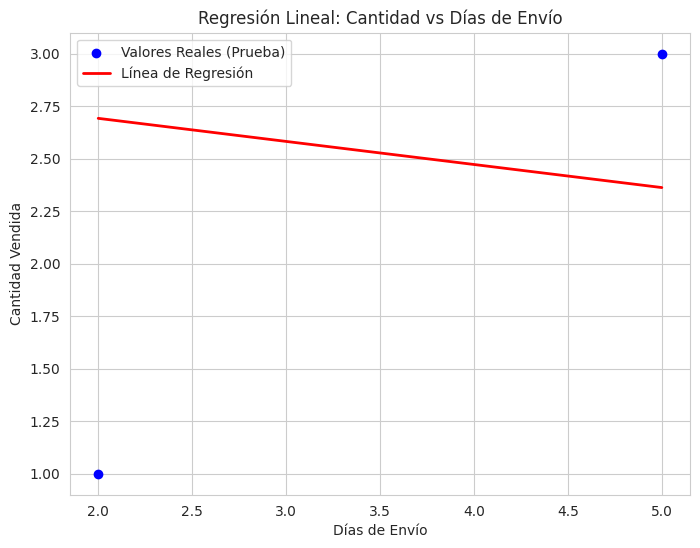

In [2]:
# =======================================================
# PASO 1: Importar librerías
# =======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importamos la herramienta clave de Machine Learning (sklearn)
from sklearn.linear_model import LinearRegression
# Importamos herramientas para dividir los datos
from sklearn.model_selection import train_test_split
# Importamos herramientas para evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style("whitegrid")

print("✅ Librerías de modelado importadas.")
print("-" * 70)


# =======================================================
# PASO 2: Recrear y Preparar el DataFrame Limpio
# =======================================================

# Usaremos los datos del Módulo 2, asegurando que no haya NaN.
datos = {
    'Precio_Unitario': [15.5, 15.5, 15.5, 22.0, 10.0, 15.5], # NaN imputados con 15.5
    'Cantidad': [3, 1, 3, 2, 4, 1],
    'Dias_Envio': [5, 2, 5, 7, 1, 2] # Una variable extra para usar como predictor (X)
}
df = pd.DataFrame(datos)

# Definimos las variables X e Y.
# X (Predictor): Usaremos 'Dias_Envio'. Es fundamental que X sea un array 2D.
X = df[['Dias_Envio']]

# Y (Objetivo/Target): Lo que queremos predecir, que es 'Cantidad'. Es un array 1D.
Y = df['Cantidad']

print(f"1. Variable X (Predictor) lista. Forma (muestras, características): {X.shape}")
print(f"2. Variable Y (Objetivo) lista. Forma (muestras): {Y.shape}")
print("-" * 70)


# =======================================================
# PASO 3: División de Datos (Entrenamiento y Prueba)
# =======================================================

# Dividimos el dataset en dos partes:
# - train (Entrenamiento): Usado para que el modelo aprenda los patrones. (80% de los datos)
# - test (Prueba): Usado para evaluar qué tan bien generaliza el modelo. (20% de los datos)
# random_state asegura que la división sea la misma cada vez que se ejecute el código.

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42
)

print(f"3. Tamaño del conjunto de Entrenamiento (X_train): {len(X_train)} muestras")
print(f"4. Tamaño del conjunto de Prueba (X_test): {len(X_test)} muestras")
print("-" * 70)


# =======================================================
# PASO 4: Creación y Entrenamiento del Modelo
# =======================================================

# 4a. Creamos una instancia del modelo de Regresión Lineal
modelo_regresion = LinearRegression()

# 4b. Entrenamos el modelo usando solo los datos de ENTRENAMIENTO
modelo_regresion.fit(X_train, Y_train)

print("5. Modelo de Regresión Lineal Simple entrenado.")
print(f"   Intercepto (beta_0): {modelo_regresion.intercept_:.2f}")
print(f"   Coeficiente (beta_1 para Dias_Envio): {modelo_regresion.coef_[0]:.2f}")
print("-" * 70)


# =======================================================
# PASO 5: Predicción y Evaluación del Modelo (CORREGIDO)
# =======================================================

# 5a. Hacemos predicciones sobre el conjunto de PRUEBA
Y_pred = modelo_regresion.predict(X_test)

# 5b. Evaluamos el rendimiento usando métricas comunes:

# R² (Coeficiente de Determinación): Qué tan bien se ajusta el modelo (cercano a 1 es mejor).
r2 = r2_score(Y_test, Y_pred)

# MSE (Error Cuadrático Medio): Calculamos el error SIN el argumento 'squared'.
mse = mean_squared_error(Y_test, Y_pred)

# RMSE (Error Cuadrático Medio Raíz): Calculamos la raíz cuadrada del MSE usando numpy.sqrt
rmse = np.sqrt(mse)

print("6. Evaluación del rendimiento en datos de PRUEBA:")
print(f"   R² (Coeficiente de Determinación): {r2:.4f}")
print(f"   RMSE (Error Cuadrático Medio Raíz): {rmse:.4f}")

# =======================================================
# PASO 6: Visualización de la Línea de Ajuste (Opcional pero útil)
# =======================================================

# Graficamos los datos de prueba y la línea de regresión.
plt.figure(figsize=(8, 6))

# Puntos Reales (de prueba)
plt.scatter(X_test, Y_test, color='blue', label='Valores Reales (Prueba)')

# Línea de Predicción (la línea que el modelo encontró)
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Línea de Regresión')

plt.title('Regresión Lineal: Cantidad vs Días de Envío')
plt.xlabel('Días de Envío')
plt.ylabel('Cantidad Vendida')
plt.legend()
plt.show()